In [1]:
import pandas as pd

# Replace 'your_file_path.xlsx' with the path to your Excel file
file_path = r"C:\Users\HARSHITA MEHRA\OneDrive\Desktop\female.xlsx"

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify the import
print(df.head())


   S. 0  Joint Pain  Age  Menopause    height  weight  Diabetic  \
0     1           1   54           1  1.67640      78         0   
1     2           1   49           1  1.37160      59         0   
2     3           1   57           1  1.52400      72         0   
3     4           1   40           0  1.49352      54         0   
4     5           1   46           0  1.43256      63         0   

   Hypothyroidism  Number of Pregnancies  Family History  \
0               0                      3               0   
1               1                      3               0   
2               1                      3               0   
3               0                      3               0   
4               0                      5               0   

   Maximum Walking distance  obesity  Diagnosis  
0                       1.0        1          1  
1                       1.0        1          1  
2                       2.0        1          1  
3                       2.0        0

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Split the dataset into features (X) and target (y)
X = df.drop(columns=['Diagnosis'])  # Assuming 'diagnosis' is the target column
y = df['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels, e.g., 'linear', 'rbf', 'poly', etc.

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8888888888888888

Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.87      0.93        23

    accuracy                           0.89        27
   macro avg       0.79      0.93      0.83        27
weighted avg       0.94      0.89      0.90        27



Accuracy: 0.8888888888888888

Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.87      0.93        23

    accuracy                           0.89        27
   macro avg       0.79      0.93      0.83        27
weighted avg       0.94      0.89      0.90        27



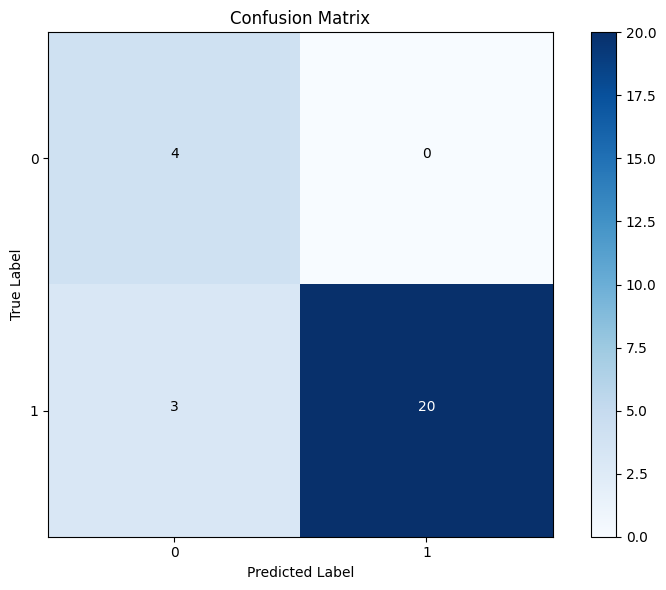

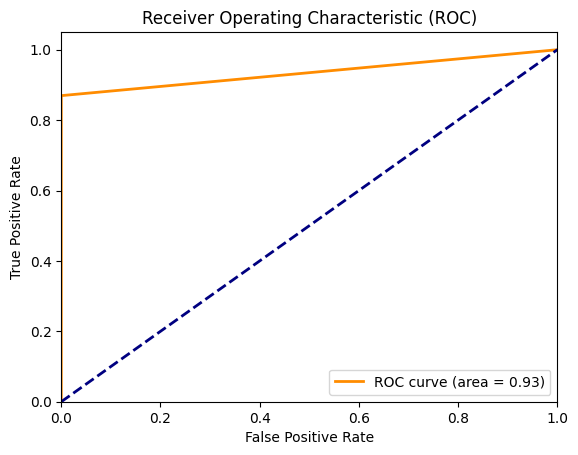

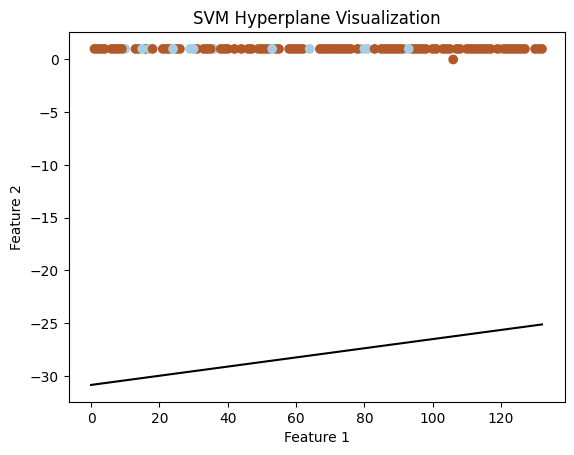

Equation of the hyperplane: 0.0073236469195343545*X1 + -0.16861870728481643*X2 + -5.201725893055026 = 0


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc

file_path = r"C:\Users\HARSHITA MEHRA\OneDrive\Desktop\female.xlsx"

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)


# Split the dataset into features (X) and target (y)
X = df.drop(columns=['Diagnosis'])  # Assuming 'diagnosis' is the target column
y = df['Diagnosis']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels, e.g., 'linear', 'rbf', 'poly', etc.

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['0', '1']  # Assuming '0' represents one class and '1' represents another
tick_marks = [0, 1]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the confusion matrix values on each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()

# Show plot
plt.show()

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plotting the hyperplane
def plot_hyperplane(X, y, clf):
    # Get the coefficients of the hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(X.min(), X.max())
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # Plot the hyperplane
    plt.plot(xx, yy, 'k-')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Hyperplane Visualization')
    plt.show()

# Plot hyperplane
plot_hyperplane(X_train.values, y_train.values, svm_classifier)

# Print the equation of the hyperplane
print("Equation of the hyperplane: {}*X1 + {}*X2 + {} = 0".format(svm_classifier.coef_[0][0], svm_classifier.coef_[0][1], svm_classifier.intercept_[0]))


C:\Users\HARSHITA MEHRA\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


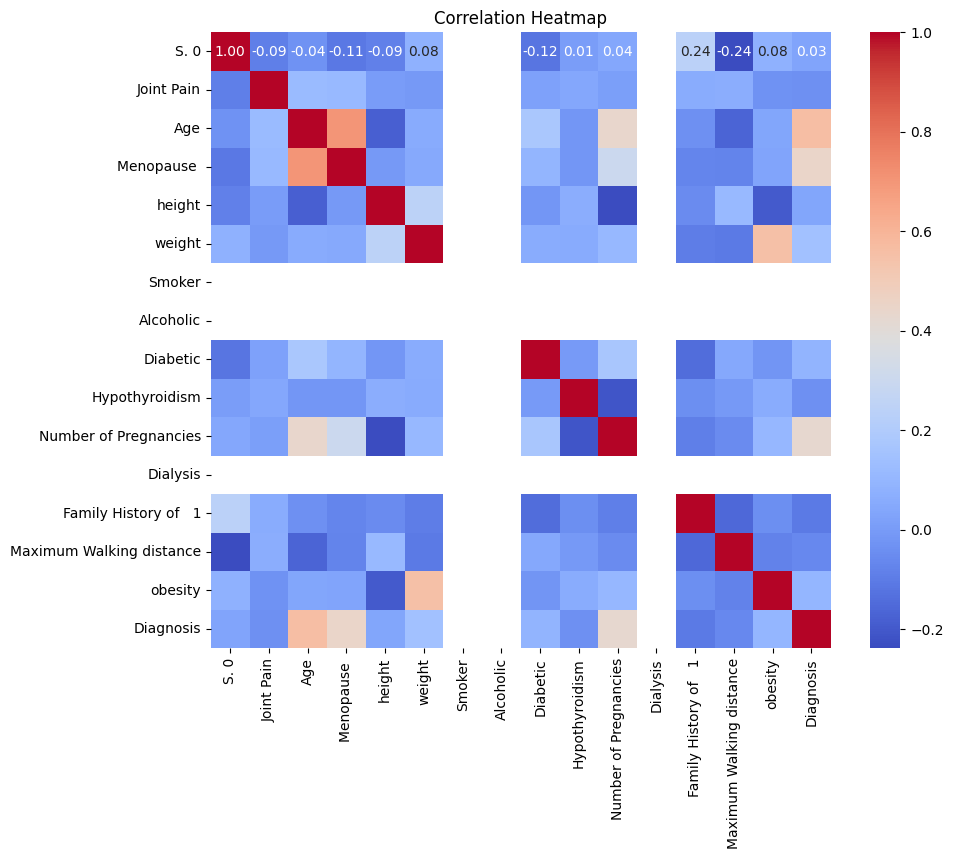

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


C:\Users\HARSHITA MEHRA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9259259259259259

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.91      0.95        23

    accuracy                           0.93        27
   macro avg       0.83      0.96      0.88        27
weighted avg       0.95      0.93      0.93        27



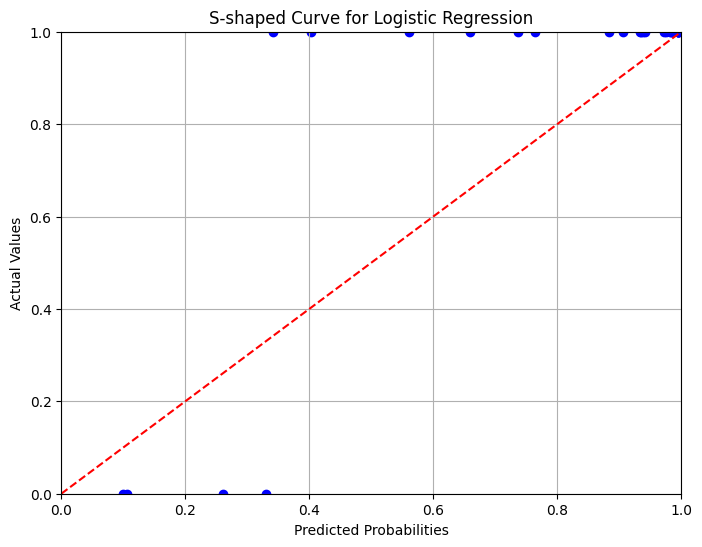

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = r"C:\Users\HARSHITA MEHRA\OneDrive\Desktop\female.xlsx"  # Replace with the actual file path
df = pd.read_excel(file_path)

# Assuming 'Diagnosis' is the target column and 'Feature1' and 'Feature2' are the features
X = df.drop(columns=['Diagnosis']) 
y = df['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Predict probabilities on the test set
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Plot the S-shaped curve
plt.figure(figsize=(8, 6))
plt.scatter(y_probs, y_test, color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Diagonal line for reference
plt.title('S-shaped Curve for Logistic Regression')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Actual Values')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


The best value of k based on the lowest error rate is 9, with an error rate of 0.1111


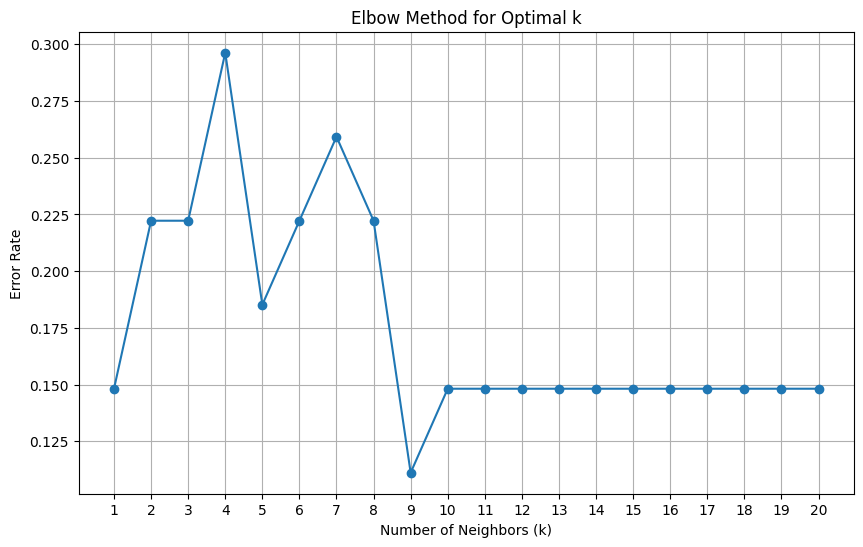

In [26]:

# Initialize variables for storing errors
k_values = range(1, 21)  # Test k from 1 to 20
errors = []

# Iterate through different values of k
for k in k_values:
    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Predict the target values for the test set
    y_pred = knn.predict(X_test)
    
    # Calculate error rate and store it
    error_rate = 1 - accuracy_score(y_test, y_pred)
    errors.append(error_rate)

# Find the best value of k based on the lowest error rate
best_k = k_values[np.argmin(errors)]
best_error_rate = min(errors)

print(f"The best value of k based on the lowest error rate is {best_k}, with an error rate of {best_error_rate:.4f}")

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = r"C:\Users\HARSHITA MEHRA\OneDrive\Desktop\female.xlsx"  # Replace with the actual file path
df = pd.read_excel(file_path)

# Assuming 'Diagnosis' is the target column and 'Feature1' and 'Feature2' are the features
X = df.drop(columns=['Diagnosis']) 
y = df['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=9
knn = KNeighborsClassifier(n_neighbors=9)

# Train the model
knn.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8888888888888888


Accuracy: 0.8518518518518519

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.91      0.91      0.91        23

    accuracy                           0.85        27
   macro avg       0.71      0.71      0.71        27
weighted avg       0.85      0.85      0.85        27



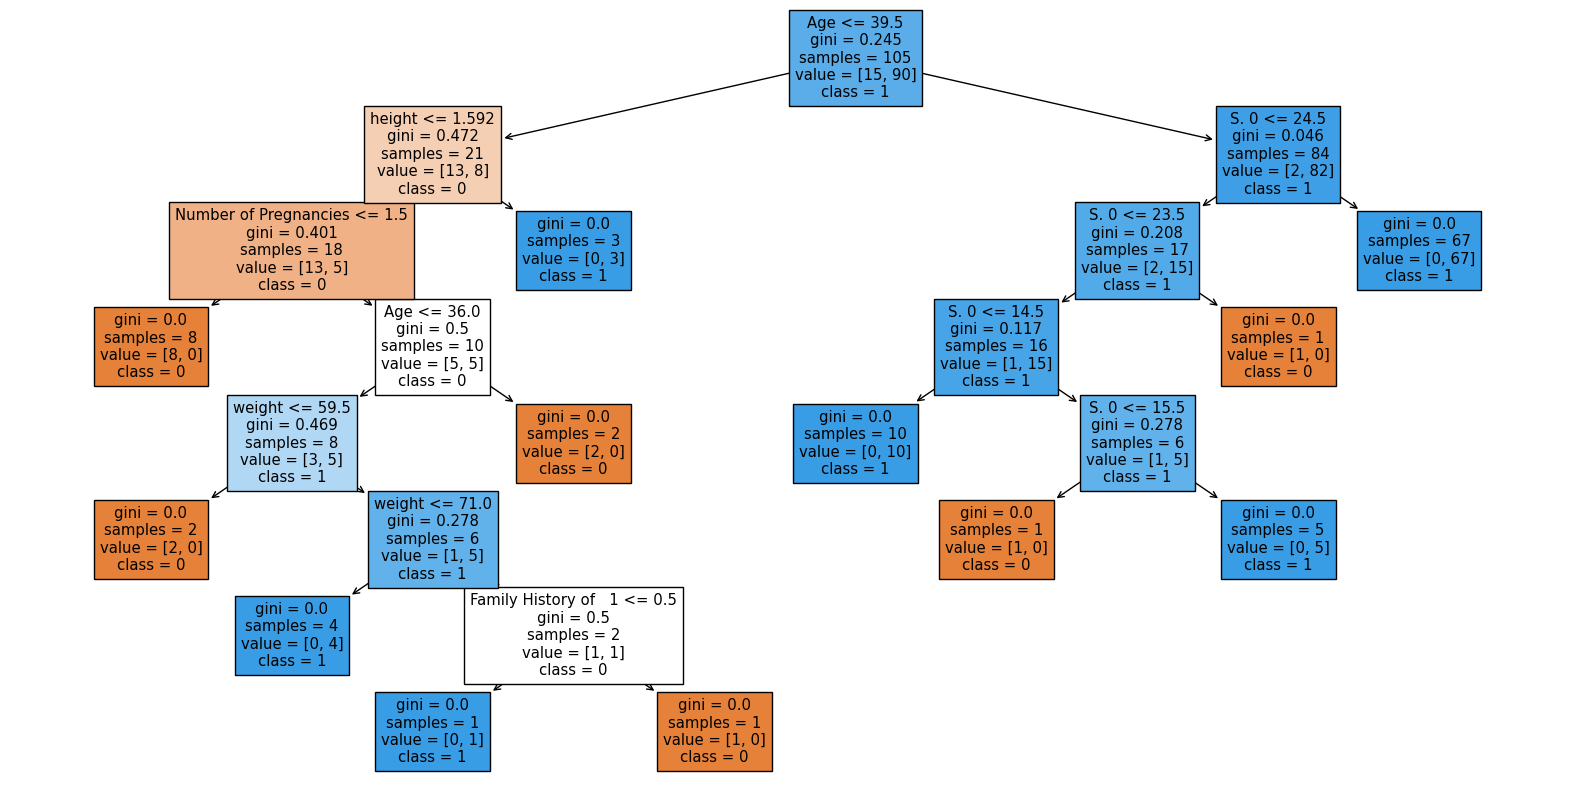

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\HARSHITA MEHRA\OneDrive\Desktop\female.xlsx"  # Replace with the actual file path
df = pd.read_excel(file_path)

# Assuming 'Diagnosis' is the target column and 'Feature1' and 'Feature2' are the features
X = df.drop(columns=['Diagnosis']) 
y = df['Diagnosis']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the classifier
decision_tree.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()


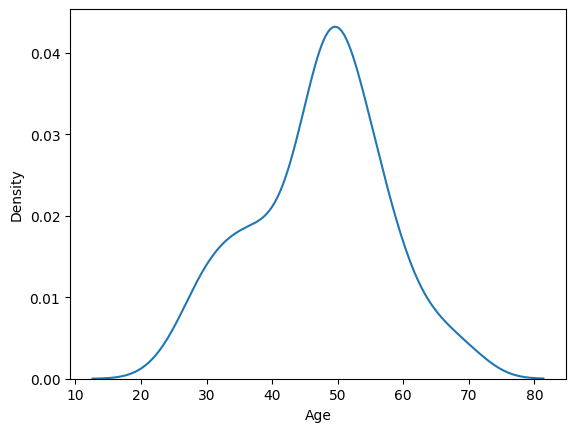

In [31]:
sns.kdeplot(df, x="Age")
plt.show()

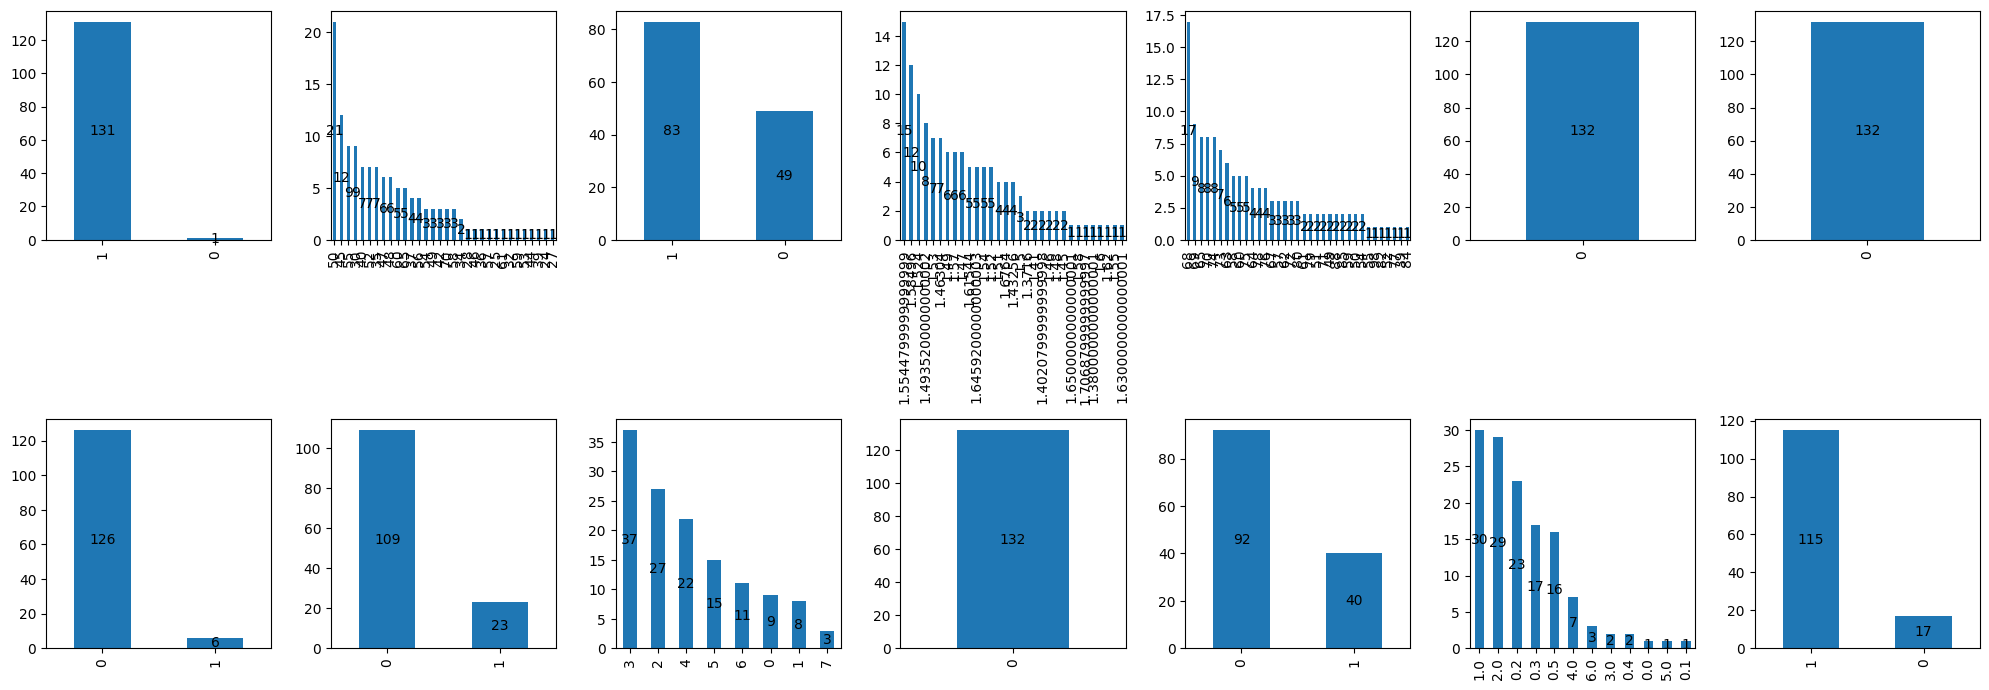

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 7))
index = 1
for i in range(2):
    for j in range(7):
        counts = df[df.columns[index]].value_counts()
        counts.plot(kind="bar", ax=axes[i][j])
        for container in axes[i][j].containers:
            axes[i][j].bar_label(container, label_type="center")
        index += 1
        
plt.tight_layout()
plt.show()

C:\Users\HARSHITA MEHRA\AppData\Local\Temp\ipykernel_1720\3021372446.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x="Age", hue=df.columns[index], ax=axes[i][j])
C:\Users\HARSHITA MEHRA\AppData\Local\Temp\ipykernel_1720\3021372446.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x="Age", hue=df.columns[index], ax=axes[i][j])
C:\Users\HARSHITA MEHRA\AppData\Local\Temp\ipykernel_1720\3021372446.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x="Age", hue=df.columns[index], ax=axes[i][j])
C:\Users\HARSHITA MEHRA\AppData\Local\Temp\ipykernel_1720\3021372446.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x="Age", hue=df.columns

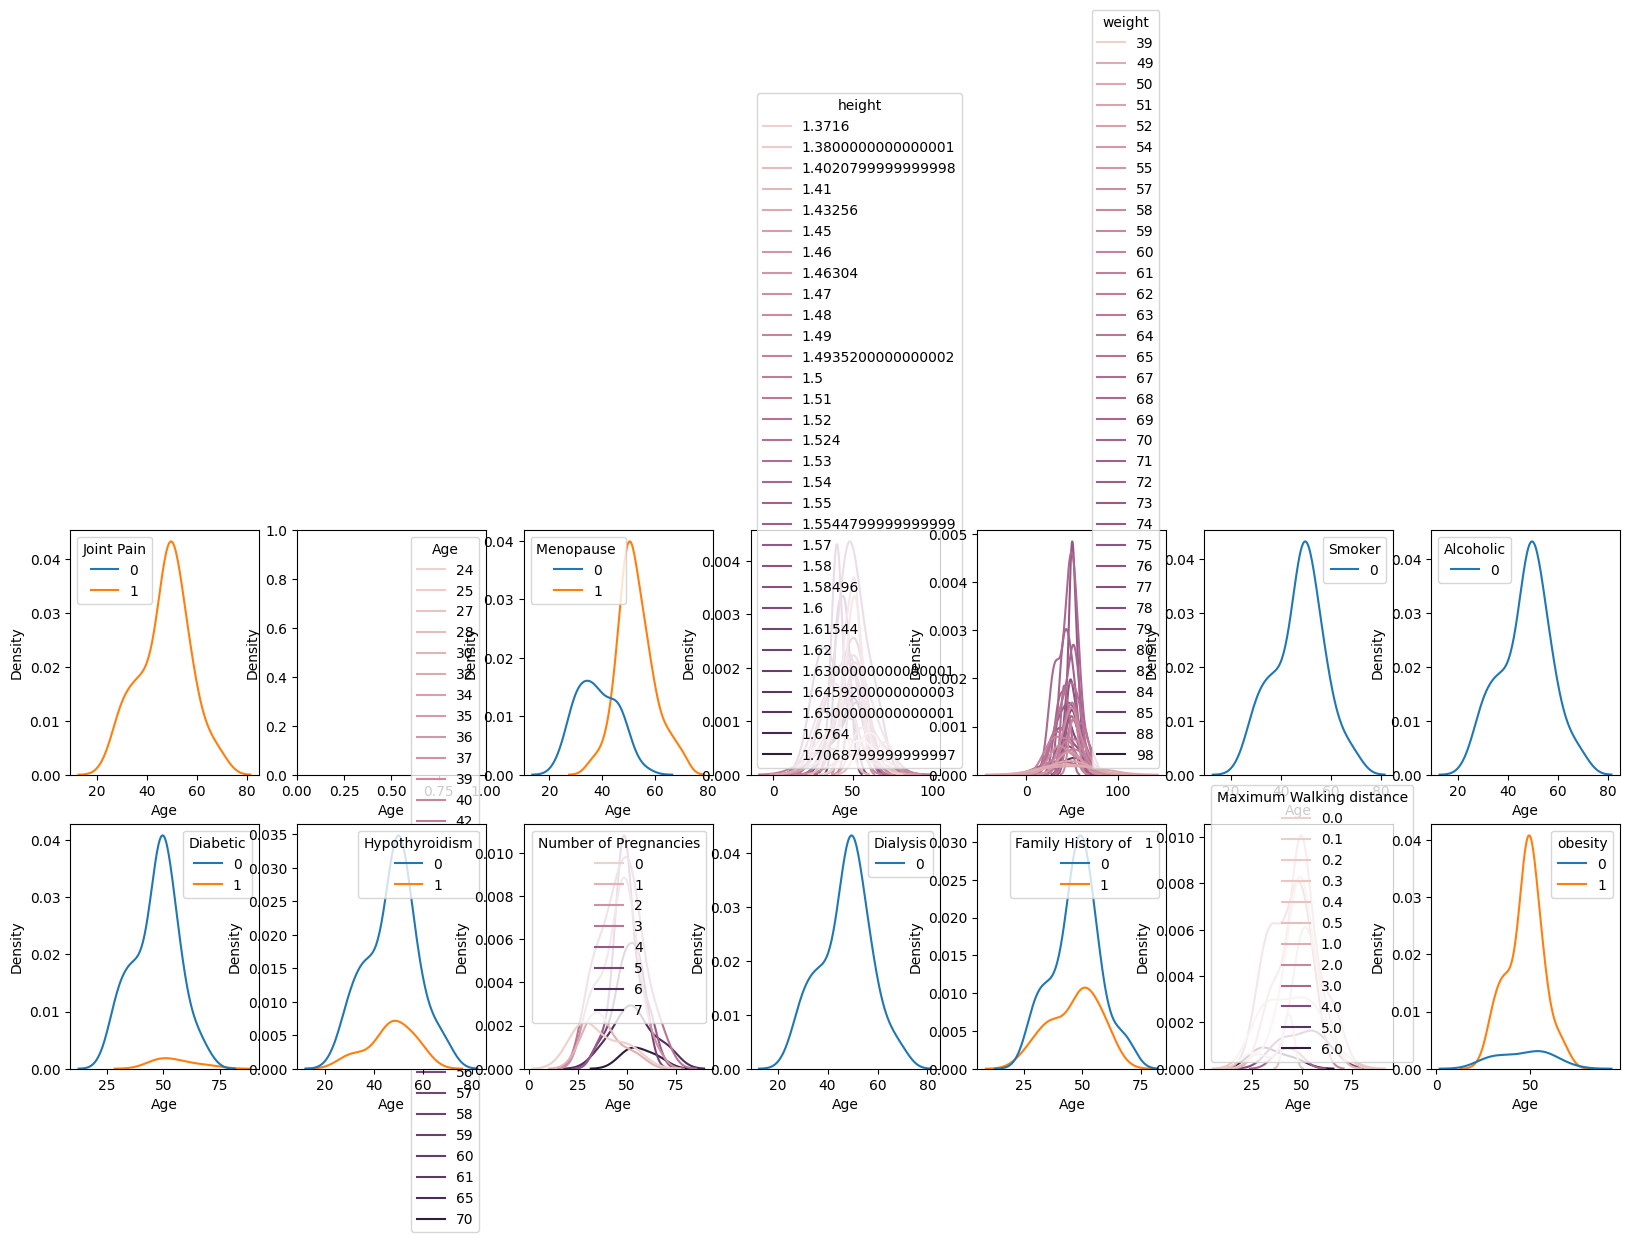

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 7))
index = 1
for i in range(2):
    for j in range(7):
        sns.kdeplot(df, x="Age", hue=df.columns[index], ax=axes[i][j])
        index += 1
        
plt.tight_layout()
plt.show()

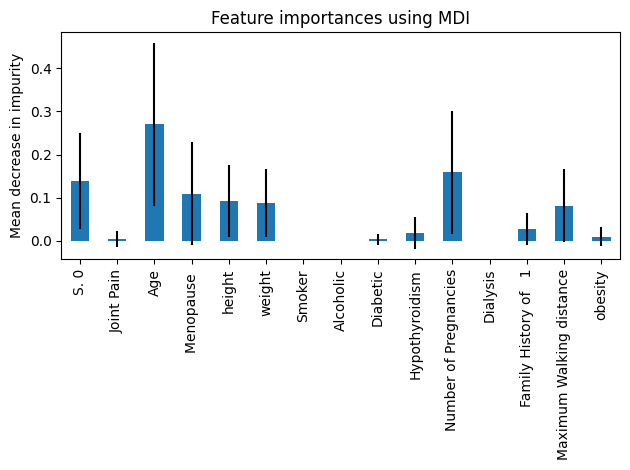

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


# Load the dataset
file_path = r"C:\Users\HARSHITA MEHRA\OneDrive\Desktop\female.xlsx"  # Replace with the actual file path
df = pd.read_excel(file_path)

# Assuming 'Diagnosis' is the target column and 'Feature1' and 'Feature2' are the features
X = df.drop(columns=['Diagnosis']) 
y = df['Diagnosis']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=df.columns[:-1])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [42]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 3.3 MB/s eta 0:00:00


In [43]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
lgr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
xgbc = XGBClassifier()

models = [rfc, etc, gbc, abc,
         lgr, gnb, svc, xgbc]

names = ["Random Forest", "Extra Trees", "Gradient Boosting",
        "Ada Boost", "Logistic Regression", "Naive Bayes",
        "Support Vectors", "XGBoost"]

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def training(model, name, ax):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the target values for the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    score = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(name)  # Set the title of the plot
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    
    # Return the accuracy score and classification report
    return score, report


C:\Users\HARSHITA MEHRA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HARSHITA MEHRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HARSHITA MEHRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-define

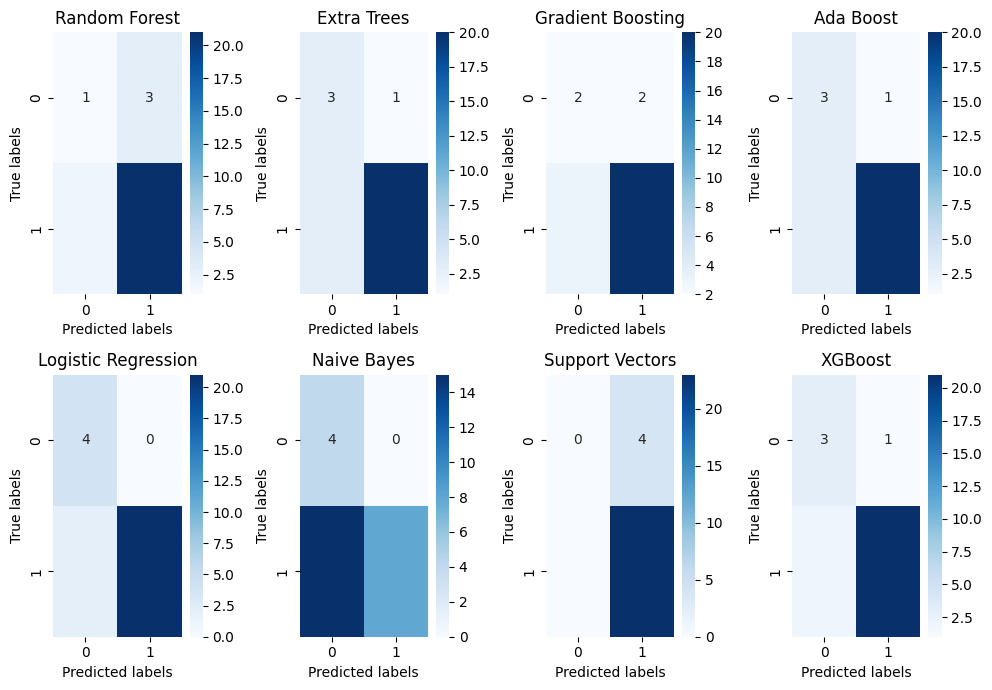

Accuracy with Random Forest: 0.8148148148148148
Accuracy with Extra Trees: 0.8518518518518519
Accuracy with Gradient Boosting: 0.8148148148148148
Accuracy with Ada Boost: 0.8518518518518519
Accuracy with Logistic Regression: 0.9259259259259259
Accuracy with Naive Bayes: 0.4444444444444444
Accuracy with Support Vectors: 0.8518518518518519
Accuracy with XGBoost: 0.8888888888888888


In [51]:
reports = []
scores = []
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 7))
index = 0
for i in range(2):
    for j in range(4):
        score, report = training(models[index], names[index], axes[i][j])
        scores.append(score)  # Append the score to the scores list
        reports.append(report)
        index += 1

plt.tight_layout()
plt.show()

# Print accuracy with each model
for name, score in zip(names, scores):
    print(f"Accuracy with {name}: {score}")


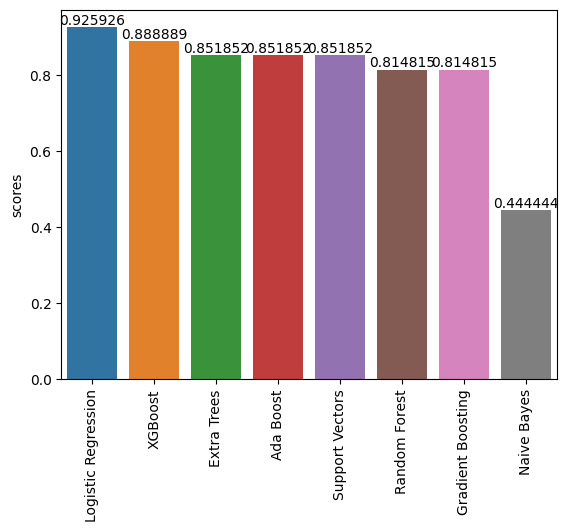

In [52]:
dt = pd.DataFrame({"scores": scores}, index=names)
dt = dt.sort_values("scores", ascending=False)
fig, axes = plt.subplots()
sns.barplot(x=dt.index, y=dt.iloc[:, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

In [57]:
# Install Graphviz and the Graphviz Python package
!pip install graphviz
!apt-get install graphviz


'apt-get' is not recognized as an internal or external command,
operable program or batch file.


<Figure size 8000x6000 with 0 Axes>

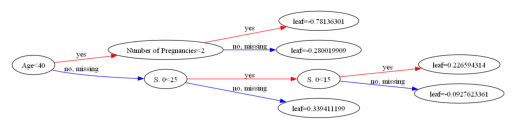

In [8]:
#xgboost

import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_tree
from sklearn.model_selection import train_test_split
# Load the dataset
file_path = r"C:\Users\HARSHITA MEHRA\OneDrive\Desktop\female.xlsx"  # Replace with the actual file path
df = pd.read_excel(file_path)

# Assuming 'Diagnosis' is the target column and 'Feature1' and 'Feature2' are the features
X = df.drop(columns=['Diagnosis']) 
y = df['Diagnosis']


# 3. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# 5. Visualize the trained model

plt.figure(figsize=(40, 30), dpi=200)
plot_tree(xgb_classifier, num_trees=0, rankdir='LR')
plt.show()



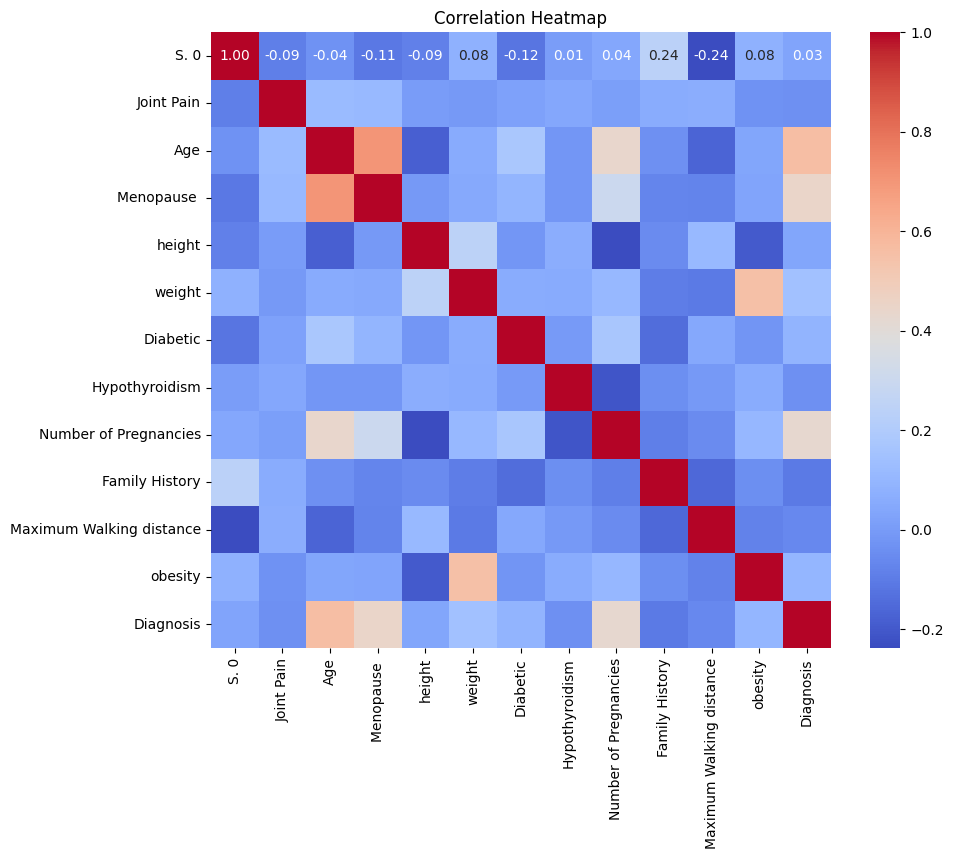

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


C:\Users\HARSHITA MEHRA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


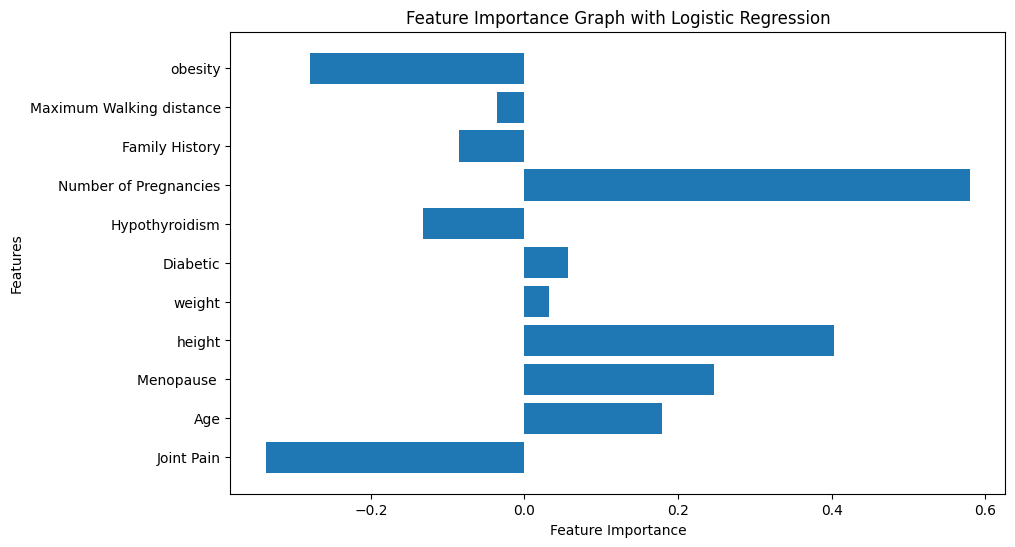

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\HARSHITA MEHRA\OneDrive\Desktop\female.xlsx"  # Replace with the actual file path
df = pd.read_excel(file_path)

# Assuming 'Diagnosis' is the target column and 'Feature1' and 'Feature2' are the features
X = df.drop(columns=['Diagnosis']) 
y = df['Diagnosis']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Get feature importances
feature_importances = logreg.coef_[0]

# Get feature names
feature_names = X.columns

# Plotting feature importances
plt.figure(figsize=(10,6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Graph with Logistic Regression')
plt.show()

C:\Users\HARSHITA MEHRA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


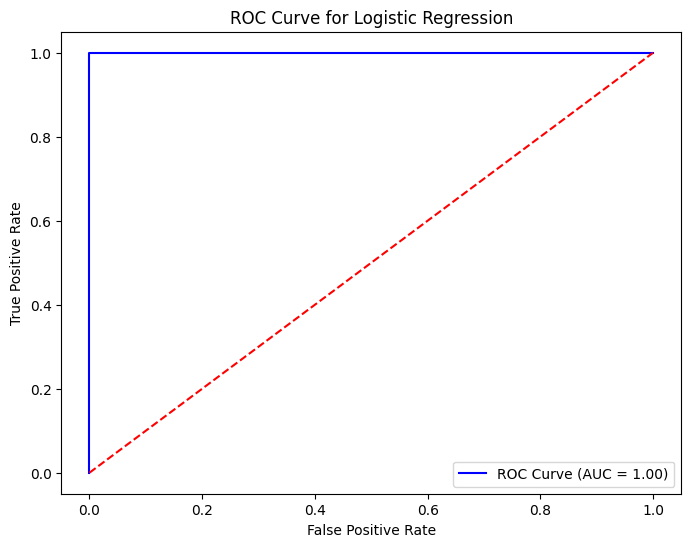

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
logreg = LogisticRegression()

file_path = r"C:\Users\HARSHITA MEHRA\OneDrive\Desktop\female.xlsx"  # Replace with the actual file path
df = pd.read_excel(file_path)

# Assuming 'Diagnosis' is the target column and 'Feature1' and 'Feature2' are the features
X = df.drop(columns=['Diagnosis']) 
y = df['Diagnosis']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict probabilities for the test set
probs = logreg.predict_proba(X_test)
probs = probs[:, 1]  # Keep probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()